In [30]:
import numpy as np
import wave
import matplotlib.pyplot as plt
from scipy.io import wavfile

from scipy.linalg import inv
from pydub import AudioSegment
from pydub.utils import which 


def convert_mp3_to_wav(mp3_path, wav_path):
    audio = AudioSegment.from_mp3(mp3_path)
    audio.export(wav_path, format="wav")


def load_audio(filename):
    with wave.open(filename, 'rb') as audio_file:
        params = audio_file.getparams()
        num_channels, sample_width, frame_rate, num_frames = params[:4]
        audio_data = audio_file.readframes(num_frames)
        audio_array = np.frombuffer(audio_data, dtype=np.int16).reshape(-1, num_channels)
        return audio_array, frame_rate


def save_audio(filename, matrix, sample_rate):
    num_channels = matrix.shape[1] if matrix.ndim > 1 else 1
    audio_data = np.clip(matrix, -32768, 32767).astype(np.int16).tobytes()

    with wave.open(filename, 'wb') as audio_file:
        audio_file.setnchannels(num_channels)
        audio_file.setsampwidth(2)
        audio_file.setframerate(sample_rate)
        audio_file.writeframes(audio_data)


def encrypt_audio(matrix, key_matrix):
    return np.dot(matrix, key_matrix)


def decrypt_audio(encrypted_matrix, key_matrix_inv):
    return np.dot(encrypted_matrix, key_matrix_inv)


def generate_key_matrix(size):
    while True:
        key_matrix = np.random.randint(1, 10, (size, size))
        try:
            key_matrix_inv = inv(key_matrix)
            return key_matrix, key_matrix_inv
        except np.linalg.LinAlgError:
            continue


if __name__ == "__main__":
    input_mp3 = "audio.wav" 
    input_wav = "input_audio.wav"
    output_encrypted = "encrypted.wav"
    output_decrypted = "decrypted.wav"

    convert_mp3_to_wav(input_mp3, input_wav)

    audio_matrix, sample_rate = load_audio(input_wav)

    key_matrix, key_matrix_inv = generate_key_matrix(audio_matrix.shape[1])

    encrypted_matrix = encrypt_audio(audio_matrix, key_matrix)
    save_audio(output_encrypted, encrypted_matrix, sample_rate)

    decrypted_matrix = decrypt_audio(encrypted_matrix, key_matrix_inv)
    save_audio(output_decrypted, decrypted_matrix, sample_rate)

    print("MP3 file has been successfully converted to WAV, encrypted, and decrypted!")


MP3 file has been successfully converted to WAV, encrypted, and decrypted!


Text(0.5, 1.0, 'Original Audio Plot')

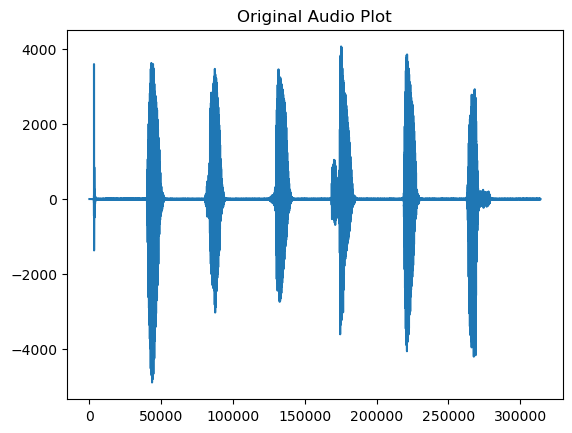

In [ ]:

fs, data = wavfile.read('audio.wav')
plt.plot(data)            
plt.title("Original Audio Plot")


Text(0.5, 1.0, 'Encrypted Audio Plot')

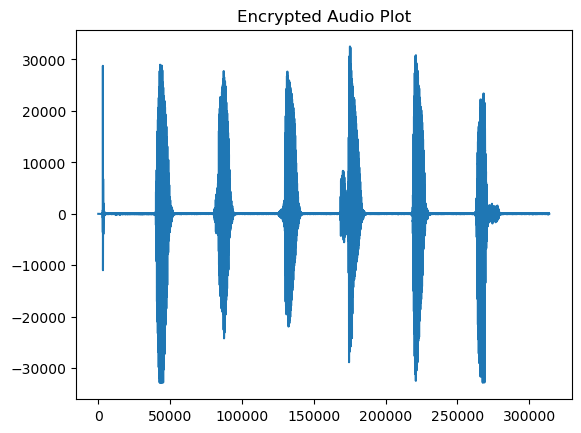

In [32]:
fs, data = wavfile.read('encrypted.wav')
plt.plot(data)            
plt.title("Encrypted Audio Plot")

Text(0.5, 1.0, 'Decrypted Audio Plot')

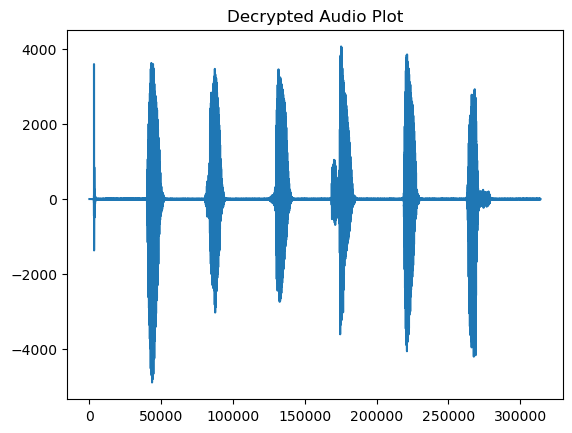

In [33]:
fs, data = wavfile.read('decrypted.wav')
plt.plot(data)            
plt.title("Decrypted Audio Plot")